Beste Peter, enorm bedankt voor je hulp met mijn eerste Python code! Ik hoop dat het een beetje helder is wat ik overal probeerde te doen, en tot vanmiddag :)

In onderstaande wilde ik graag het woordaantal van het corpus berekenen.



In [1]:
from collections import Counter 
import os 
import re
from nltk import word_tokenize , sent_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
import nltk
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def remove_punctuation(words):
    new_list= []
    for w in words:
        if w.isalnum():
            new_list.append( w )
    return new_list

def remove_extension(file):
    return( file[:file.rindex('.'):] )


lemmatiser = WordNetLemmatizer()
def lemmatise(full_text):
    sentences = sent_tokenize(full_text)
    lemmatised_text = ''

    for sent in sentences:
        words = word_tokenize(sent)
        words = remove_punctuation(words)
        pos = nltk.pos_tag(words)
        lemmatised_sent = ''

        for i,word in enumerate(words):
            word = word.lower()
            posTag = ptb_to_wordnet( pos[i][1] )

            if re.search( r'\w+' , posTag , re.IGNORECASE ):
                lemma = lemmatiser.lemmatize( words[i] , posTag )
                lemmatised_sent += lemma + ' '
            else:
                lemmatised_sent += word + ' '
        lemmatised_text += lemmatised_sent

    return lemmatised_text

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.append('illustration') 
stopwords.append('chapter')

def ptb_to_wordnet(PTT):

    if PTT.startswith('J'):
        ## Adjective
        return 'a'
    elif PTT.startswith('V'):
        ## Verb
        return 'v'
    elif PTT.startswith('N'):
        ## Noune
        return 'n'
    elif PTT.startswith('R'):
        ## Adverb
        return 'r'
    else:
        return ''


dir = 'Lemmatised'
if not os.path.isdir(dir):
    os.mkdir(dir)

> De onderstaande cel lemmatiseert alle teksten en berekent de woordfrequenties. De boeken moeten worden opgeslagen in de map 'Corpus'

In [2]:
dir = 'Corpus'


texts = []
metadata = dict()

freq = Counter()

for file in os.listdir(dir):
    if re.search('txt$',file):
        print(f'{file} ...')
        year = file[file.rindex('_')+1:].replace('.txt','')
        if re.search(r'\-' , year):
            year = year[ : year.index('-')]
        year = int(year)
        title_parts = re.split( r'_',file)
        title = title_parts[0]+'_'+title_parts[1]
        
        metadata[title] = year

        file_handler = open(os.path.join(dir,file),encoding='utf-8')
        full_text = file_handler.read()  
        
        lemmatised = lemmatise(full_text)
        out_file = f'{remove_extension(file)}_lemma.txt'

        out_file = os.path.join( 'Lemmatised' , out_file )
        texts.append(out_file)
        with open( out_file ,'w',encoding='utf-8') as out:
            out.write(lemmatised)
            
        
        words = word_tokenize(full_text.lower())
        words = remove_punctuation(words)
        words = [word for word in words if word not in stopwords]
        freq.update(words)
print('Done!')

Lang_BooksandBookmen_1887.txt ...
Dibdin_Bibliomania_1876.txt ...
Lang_TheLibrary_1881.txt ...
Nodier_TheBookCollector_1841-1951.txt ...
Harper_BookLoversBibliomaniacsandBookClubs_1904.txt ...
Slater_RomanceofBook-Collecting_1898.txt ...
Blades_EnemiesofBooks_1888.txt ...
Vincent_BibliotaphAndOtherPeople_1899.txt ...
Slater_Book CollectingAGuideforAmateurs_1892.txt ...
Burton_TheBookHunter_1862.txt ...
Hazlitt_TheBookCollector_1904.txt ...
Browne_IntheTrackoftheBookWorm_1897.txt ...
Wheatley_BookLoversLibraryHowtoFormaLibrary_1886.txt ...
Mermet_CrazyBookCollecting_1894.txt ...
Allan_theBookHunteratHome_1922.txt ...
Humphreys_thePrivateLibrary_1800.txt ...
Dibdin_LibraryCompanion_1824.txt ...
Elton_TheGreatBookCollectors_1893.txt ...
Koopman_BookLoverandhisBooks_1917.txt ...
Merryweather_BibliomaniaintheMiddleAges_1900.txt ...
Dibdin_BibliographicalDecameron_1817.txt ...
Maclaren_BooksandBookmen_1912.txt ...
Arnod_FirstReportofaBookCollector_1898.txt ...
DeBury_Philobiblon_1996.txt ...

In [3]:
tokens = sum(freq.values())
types = len(freq.keys())
print(f'Number of tokens: {tokens}')
print(f'Number of types: {types}')

Number of tokens: 1208183
Number of types: 78626


In onderstaande zou ik graag de 100 meest frequente woorden zien. 

In [4]:
for word,count in freq.most_common(500): 
    print( f'{word} => {count}') 

books => 9741
one => 8093
book => 5248
may => 5085
library => 4828
upon => 4668
first => 4564
de => 4425
copy => 3991
would => 3877
great => 3510
many => 3493
printed => 3300
work => 3114
old => 3112
time => 3062
two => 3022
volumes => 3008
edition => 2926
volume => 2680
much => 2470
years => 2365
works => 2346
man => 2331
well => 2316
good => 2280
little => 2237
must => 2234
collection => 2183
day => 2150
us => 2132
every => 2064
yet => 2055
made => 2028
paper => 1976
history => 1973
even => 1953
copies => 1943
english => 1938
see => 1934
could => 1910
said => 1895
also => 1874
like => 1869
vol => 1842
large => 1822
published => 1814
john => 1741
without => 1738
et => 1732
found => 1695
folio => 1685
part => 1683
never => 1683
among => 1673
life => 1656
sale => 1652
however => 1646
sir => 1636
might => 1632
catalogue => 1596
author => 1533
london => 1485
0 => 1478
last => 1474
new => 1470
another => 1463
year => 1448
three => 1430
let => 1422
rare => 1410
long => 1396
8vo => 1367
cent

> Frequenties van de gelemmatiseerde woorden

In [5]:
freq_lemma = Counter()
dir = 'Lemmatised'
for file in os.listdir(dir):
    path = os.path.join(dir,file)
    with open(path,encoding='utf-8') as fh:
        full_text = fh.read()
        words = word_tokenize(full_text.lower())
        words = [word for word in words if word not in stopwords]
        freq_lemma.update(words)

In [6]:
tokens = sum(freq_lemma.values())
types = len(freq_lemma.keys())
print(f'Number of tokens: {tokens}')
print(f'Number of types: {types}')

Number of tokens: 1215639
Number of types: 73025


In [7]:
for word,count in freq_lemma.most_common(500): 
    print( f'{word} => {count}') 

book => 13883
one => 8293
copy => 5962
library => 5730
volume => 5593
work => 5429
may => 5085
de => 4825
upon => 4668
first => 4565
great => 4328
say => 4309
edition => 4114
make => 3974
would => 3877
time => 3806
year => 3767
many => 3493
print => 3447
old => 3313
find => 3156
see => 3042
two => 3022
day => 3016
know => 2941
give => 2893
good => 2875
take => 2734
collection => 2602
well => 2567
much => 2470
man => 2334
little => 2237
must => 2234
part => 2228
write => 2209
paper => 2170
come => 2167
us => 2162
catalogue => 2114
large => 2095
author => 2080
every => 2064
history => 2063
page => 2056
yet => 2055
even => 1989
name => 1988
early => 1979
like => 1959
english => 1938
publish => 1917
could => 1910
place => 1899
folio => 1883
also => 1874
vol => 1842
sale => 1839
use => 1810
life => 1796
price => 1789
go => 1782
present => 1762
letter => 1741
john => 1741
without => 1738
read => 1737
et => 1732
call => 1722
never => 1683
seem => 1673
among => 1673
however => 1646
think => 16

## Lexicon

In onderstaande zou ik graag mijn lexicons inladen, maar ik begrijp de code niet 100 procent dus heb het er graag over of het zo goed zit, en hoe ik eventueel makkelijker alle lexicons tegelijk kan inladen. Ook lijkt het me mooi het grafisch te kunnen vormgeven, maar ik wist even niet hoe ik dat goed moest ombouwen. Ook zou ik graag eerst het corpus lemmatisen, maar ik wist niet zo goed hoe ik dat aan moest pakken. 

In [8]:
dir = 'Lexicons'
lexicons = dict()

for file in os.listdir(dir):

    topic = file[ : file.rindex('.') ]
    words = []
    
    with open( os.path.join(dir,file) , encoding = 'utf-8' ) as file_handler:   
        for l in file_handler: 
            if re.search( r'\w' , l ):
                words.append(l.strip())

    lexicons[topic] = words    

In [9]:
print(f'{len(lexicons)} lexicons were found.')

4 lexicons were found.


In [10]:

dir = 'Corpus'

csv = open( 'lexicon.csv' , 'w' , encoding = 'utf-8' )

## print header
csv.write( 'title,year' )
for l in lexicons:
    csv.write( f',{l.lower().strip() }' )
csv.write('\n')

dir = 'Lemmatised'
for file in os.listdir( dir ):
    if re.search( r'\.txt$' , file ):
        
        title_parts = re.split( r'_',file)
        text_title = title_parts[0]+'_'+title_parts[1]
                
        csv.write(f'{text_title},{metadata[text_title]}')

        
        path = os.path.join( dir, file )
        with open(path,encoding='utf-8') as fh:
            full_text = fh.read()
        
        print( 'Performing semantic tagging for {} ...'.format( file ) )
        
        words = word_tokenize(full_text)
        words = remove_punctuation(words)
        tokens = len(words)
        
        for l in lexicons:   
            terms = lexicons[l]
            count_occurrences = 0
            for word in words:
                if word in terms:
                    count_occurrences += 1
            
            csv.write( ',{}'.format( count_occurrences / tokens ) )
        csv.write('\n')
        
csv.close()
print("Done!")


Performing semantic tagging for Browne_IntheTrackoftheBookWorm_1897_lemma.txt ...
Performing semantic tagging for Wheatley_BookLoversLibraryHowtoFormaLibrary_1886_lemma.txt ...
Performing semantic tagging for Lang_BooksandBookmen_1887_lemma.txt ...
Performing semantic tagging for Arnod_FirstReportofaBookCollector_1898_lemma.txt ...
Performing semantic tagging for Dibdin_LibraryCompanion_1824_lemma.txt ...
Performing semantic tagging for Nodier_TheBibliomaniac_1894_lemma.txt ...
Performing semantic tagging for Slater_HowtoCollectBooks_1905_lemma.txt ...
Performing semantic tagging for Slater_RomanceofBook-Collecting_1898_lemma.txt ...
Performing semantic tagging for deMermet_CrazyBookCollecting_1894_lemma.txt ...
Performing semantic tagging for Beresford_Bibliosophia or Book-Wisdom_1810_lemma.txt ...
Performing semantic tagging for Mermet_CrazyBookCollecting_1894_lemma.txt ...
Performing semantic tagging for DeBury_Philobiblon_1996_lemma.txt ...
Performing semantic tagging for Maclaren_

In [11]:
df = pd.read_csv('lexicon.csv')
df = df.drop('title', axis=1)
df = df.groupby('year').mean()
df = df.reset_index()

df.head()

df_long = pd.melt(df,'year')

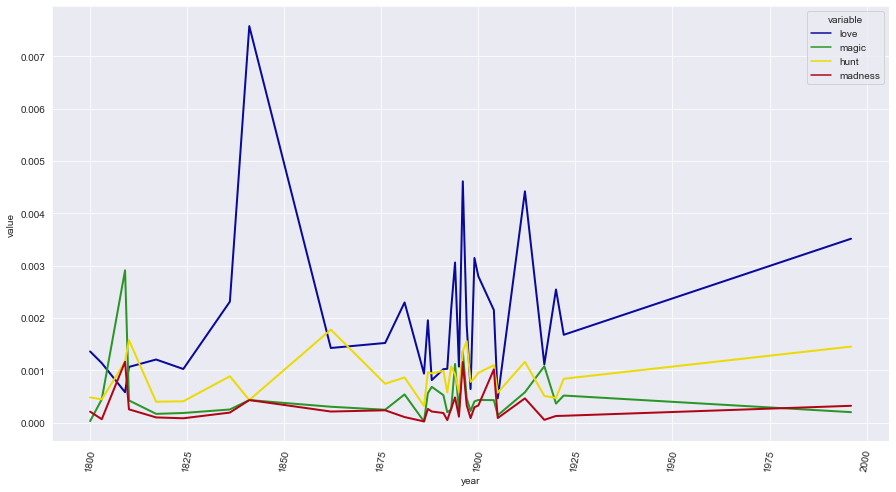

In [12]:
sns.set_style("darkgrid")

colours = ['#09099c','#299626','#ebdb02','#b00516']


fig = plt.figure( figsize = ( 15, 8))
ax = sns.lineplot(data=df_long, x="year", 
                  y="value", hue='variable',
                  palette=colours,
                  linestyle='solid',linewidth=2 )

plt.xticks(rotation= 80)
plt.show()

In [13]:
df = pd.read_csv('lexicon.csv')
df = df.drop('title', axis=1)
df = df.set_index('year')
df = df.sort_values(by='year')
df = df.groupby('year').mean()

<Figure size 720x360 with 0 Axes>

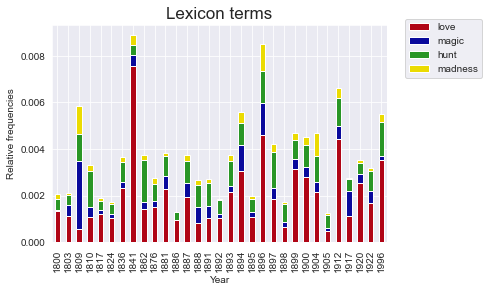

In [14]:
colours = ['#b00516','#09099c','#299626','#ebdb02']

fig = plt.figure(figsize=(10,5))
graph = df.plot(kind='bar', stacked=True, color=colours )


# The next line places the legend outside out the plot
graph.legend(bbox_to_anchor=(1.3, 1.05))

# labels for x & y axis
plt.xlabel('Year')
plt.ylabel('Relative frequencies')
 
# title of plot
plt.title('Lexicon terms', size = 17)
plt.show()

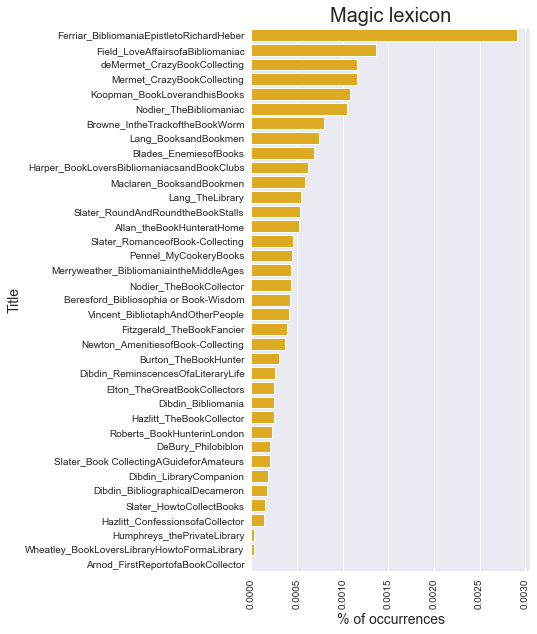

In [17]:
df = pd.read_csv('lexicon.csv')

lexicon1 = df.sort_values( by = 'magic' , ascending = False)
x_axis = 'magic'
y_axis = 'title'


fig = plt.figure( figsize=( 5 , 10 ) )

graph = sns.barplot( data=lexicon1 , x=x_axis, y=y_axis, 
                   color = '#fcba03')

graph.set_title('Magic lexicon' , size = 20) 
graph.set_xlabel('% of occurrences' , size = 14) 
graph.set_ylabel('Title' , size = 14 )

plt.xticks(rotation= 90)

plt.show()

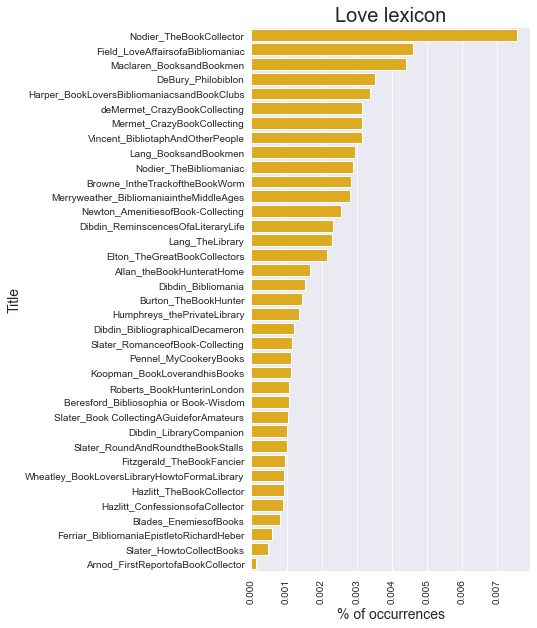

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lexicon1 = df.sort_values( by = 'love' , ascending = False)
x_axis = 'love'
y_axis = 'title'


fig = plt.figure( figsize=( 5 , 10 ) )

graph = sns.barplot( data=lexicon1 , x=x_axis, y=y_axis, 
                   color = '#fcba03')

graph.set_title('Love lexicon' , size = 20) 
graph.set_xlabel('% of occurrences' , size = 14) 
graph.set_ylabel('Title' , size = 14 )

plt.xticks(rotation= 90)

plt.show()



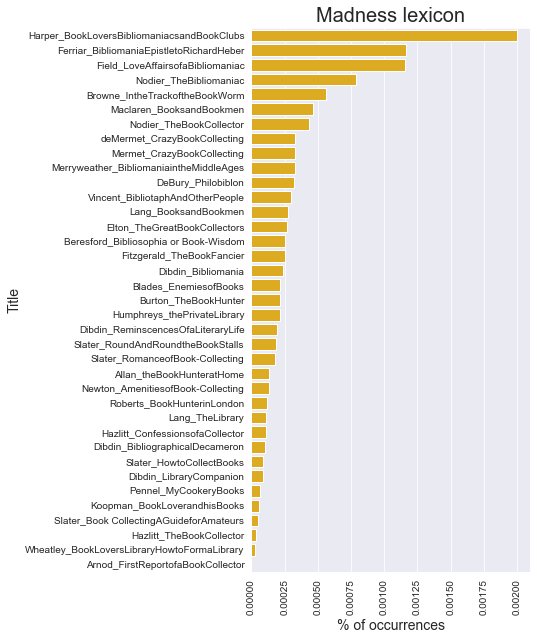

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lexicon1 = df.sort_values( by = 'madness' , ascending = False)
x_axis = 'madness'
y_axis = 'title'


fig = plt.figure( figsize=( 5 , 10 ) )

graph = sns.barplot( data=lexicon1 , x=x_axis, y=y_axis, 
                   color = '#fcba03')

graph.set_title('Madness lexicon' , size = 20) 
graph.set_xlabel('% of occurrences' , size = 14) 
graph.set_ylabel('Title' , size = 14 )

plt.xticks(rotation= 90)

plt.show()



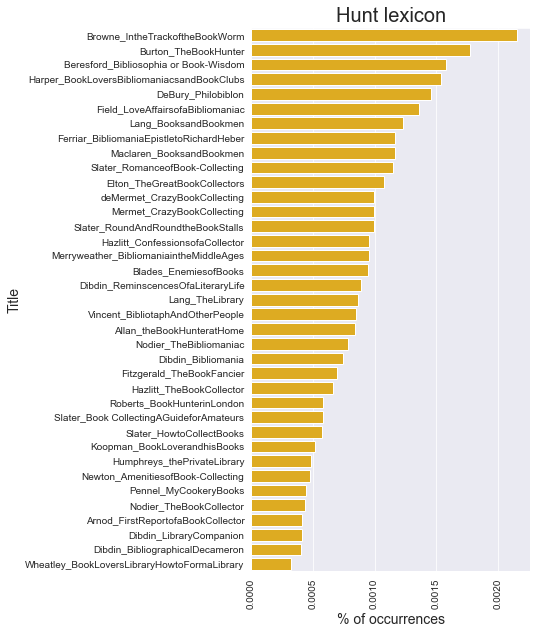

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lexicon1 = df.sort_values( by = 'hunt' , ascending = False)
x_axis = 'hunt'
y_axis = 'title'


fig = plt.figure( figsize=( 5 , 10 ) )

graph = sns.barplot( data=lexicon1 , x=x_axis, y=y_axis, 
                   color = '#fcba03')

graph.set_title('Hunt lexicon' , size = 20) 
graph.set_xlabel('% of occurrences' , size = 14) 
graph.set_ylabel('Title' , size = 14 )

plt.xticks(rotation= 90)

plt.show()



Hieronder heb ik alle code herhaald voor de andere 3 corpora. Waarschijnlijk voldoet dat niet aan de python-waarden om efficient te zijn maar het was even het enige wat ik kon bedenken :)

In [21]:
def make_regex(lexicon_list):
    regex = ''
    for i,term in enumerate(lexicon_list):
        regex += f'(\\b{term}\\b)'
        if i < len(lexicon_list)-1:
            regex += '|'
    return r'{}'.format(regex)



def concordance_word( text, regex , width = 10 ):

    concordance = []
    distance = math.floor( width /2 )

    segment_length = 0

    words = word_tokenize( text )
    words = remove_punctuation( words )
    i = 0
    for w in words:
        if re.search( regex , w , re.IGNORECASE ):
            match = ''
            for x in range( i - distance , ( i + distance ) + 1 ):
                if x >= 0 and x < len(words):
                    if len(words[x]) >= 0:
                        if re.search( regex , words[x] , re.IGNORECASE ):
                            match += words[x].upper() + ' '
                        else:
                            match += words[x] + ' '
            concordance.append( match )

        i += 1

    return concordance


        

> Hieronder wordt voor ieder lexicon bekeken hoe vaak de woorden voorkomen. De berekeningen zijn percentages van het totaal aantal woorden. 

In [ ]:
from tqdm import tqdm
out = open('concordance.txt','w',encoding='utf-8')

for text in tqdm(texts):
    out.write(text+'\n')
    for lexicon in lexicons:
        regex = make_regex(lexicons[lexicon])
        full_text = open(text,encoding='utf-8').read()
        c = concordance_word( full_text, regex , width = 20 )
        if len(c)>0:
            out.write('\n'+lexicon.upper()+'\n\n')
            for line in c:
                out.write(str(line)+'\n')
        



 24%|██████████▋                                 | 9/37 [00:31<01:09,  2.49s/it]

In [ ]:
from tqdm import tqdm

dir = 'Corpus'
out = open('concordance.txt','w',encoding='utf-8')

for text in tqdm(os.listdir(dir)):

    if re.search( r'txt$' , text):
        out.write(text)
        for lexicon in lexicons:
            out.write(lexicon, end='\n\n')
            regex = make_regex(lexicons[lexicon])
            path = os.path.join(dir,text)
            full_text = open(path,encoding='utf-8').read()
            full_text = re.sub( r'\s+' , ' ' , full_text )
            sentences = sent_tokenize(full_text)
            for s in sentences:
                if re.search(regex,s,re.IGNORECASE):
                    out.write(s)

out.close()    

In [ ]:
print('Done!')

Tot slot zou ik graag de concordances zien van het complete magic lexicon. Ik wist niet hoe ik ze per zin kon concordancen zoals je met het corpus van het traineeship had gedaan, maar had nu snel het zo gedaan. 

Excuses dat de code op een aantal plekken een beetje rommelig is, ik hoop dat er nog een beetje uit is op te merken wat mijn intenties waren. 